In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
%matplotlib inline

In [3]:
#Define path
path = r'C:\Users\msyeu\Hate Crime Analysis'

In [4]:
#Import Data
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'hate_crime_wrangled.csv'))

In [5]:
df.head()

,Unnamed: 0,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,0,3015,1991,AR0040200,Rogers,City,AR,Arkansas,West South Central,South,...,1,White,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,1,3016,1991,AR0290100,Hope,City,AR,Arkansas,West South Central,South,...,1,Black or African American,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,2,43,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,...,1,Black or African American,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,3,44,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,...,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,4,3017,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,...,1,Black or African American,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S


In [6]:
df = df.drop('Unnamed: 0', axis=1)

In [7]:
df.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,POPULATION_GROUP_CODE,...,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,City,AR,Arkansas,West South Central,South,5,...,1,White,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,City,AR,Arkansas,West South Central,South,6,...,1,Black or African American,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,1,Black or African American,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,1,Black or African American,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S


In [8]:
# Drop unnecessary columns
df = df.drop(['INCIDENT_ID', 'ORI', 'PUB_AGENCY_NAME', 'AGENCY_TYPE_NAME', 'DIVISION_NAME', 'POPULATION_GROUP_CODE', 'POPULATION_GROUP_DESC', 'LOCATION_NAME', 'VICTIM_TYPES', 'MULTIPLE_OFFENSE', 'MULTIPLE_BIAS'],axis = 1)

In [9]:
# Renaming columns 
new_names = {'DATA_YEAR':'incident_year',
             'STATE_ABBR':'state_abbr',
             'STATE_NAME':'state_name',
             'REGION_NAME':'region_name',
             'INCIDENT_DATE':'incident_date',
             'TOTAL_OFFENDER_COUNT':'offender_count',
             'OFFENDER_RACE':'offender_race',
             'VICTIM_COUNT':'victim_count',
             'OFFENSE_NAME':'offense_type',
             'TOTAL_INDIVIDUAL_VICTIMS':'total_individual_victims',
             'BIAS_DESC':'prejudice'}

df.rename(columns=new_names,inplace=True)

In [10]:
df.head()

,incident_year,state_abbr,state_name,region_name,incident_date,offender_count,offender_race,victim_count,offense_type,total_individual_victims,prejudice
0,1991,AR,Arkansas,South,31-AUG-91,1,White,1,Intimidation,1.0,Anti-Black or African American
1,1991,AR,Arkansas,South,19-SEP-91,1,Black or African American,1,Simple Assault,1.0,Anti-White
2,1991,AR,Arkansas,South,04-JUL-91,1,Black or African American,1,Aggravated Assault,1.0,Anti-Black or African American
3,1991,AR,Arkansas,South,24-DEC-91,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Anti-White
4,1991,AR,Arkansas,South,23-DEC-91,1,Black or African American,1,Aggravated Assault,1.0,Anti-White


In [11]:
# Check for missing values 
df.isnull().sum()

incident_year                0
state_abbr                   0
state_name                   0
region_name                  0
incident_date                0
offender_count               0
offender_race               19
victim_count                 0
offense_type                 0
total_individual_victims     0
prejudice                    0
dtype: int64

In [12]:
df['offender_race'].fillna('Unknown',inplace=True)

In [13]:
# checking again for missing values 
df.isnull().sum()

incident_year               0
state_abbr                  0
state_name                  0
region_name                 0
incident_date               0
offender_count              0
offender_race               0
victim_count                0
offense_type                0
total_individual_victims    0
prejudice                   0
dtype: int64

In [14]:
# Checking for duplicates
dups = df.duplicated()

In [15]:
dups.shape

(199797,)

In [26]:
hate_crime_victim = df[(df['prejudice'] == 'Anti-Black or African American') 
         | (df['prejudice'] == 'Anti-Jewish') 
         | (df['prejudice'] == 'Anti-White') 
         | (df['prejudice'] == 'Anti-Gay (Male)') 
         | (df['prejudice'] == 'Anti-Hispanic or Latino') 
         | (df['prejudice'] == 'Anti-Other Race/Ethnicity/Ancestry') 
         | (df['prejudice'] == 'Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)') 
         | (df['prejudice'] == 'Anti-Asian') 
         | (df['prejudice'] == 'Anti-Lesbian (Female)') 
         | (df['prejudice'] == 'Anti-Islamic (Muslim)')
         | (df['prejudice'] == 'Anti-American Indian/Alaska Native')]

In [27]:
hate_crime_victim.head()

,incident_year,state_abbr,state_name,region_name,incident_date,offender_count,offender_race,victim_count,offense_type,total_individual_victims,prejudice
0,1991,AR,Arkansas,South,31-AUG-91,1,White,1,Intimidation,1,Anti-Black or African American
1,1991,AR,Arkansas,South,19-SEP-91,1,Black or African American,1,Simple Assault,1,Anti-White
2,1991,AR,Arkansas,South,04-JUL-91,1,Black or African American,1,Aggravated Assault,1,Anti-Black or African American
3,1991,AR,Arkansas,South,24-DEC-91,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,1,Anti-White
4,1991,AR,Arkansas,South,23-DEC-91,1,Black or African American,1,Aggravated Assault,1,Anti-White


In [28]:
def nb_check(abbr):
    if abbr == 'NB':
        return 'NE'
    else:
        return abbr

In [29]:
by_state = hate_crime_victim
by_state['state_abbr'] = by_state['state_abbr'].apply(nb_check)

In [30]:
by_state[by_state['state_abbr']=='NE']

,incident_year,state_abbr,state_name,region_name,incident_date,offender_count,offender_race,victim_count,offense_type,total_individual_victims,prejudice
38113,1996,NE,Nebraska,Midwest,04-APR-96,1,White,1,Simple Assault,1,Anti-Hispanic or Latino
38114,1996,NE,Nebraska,Midwest,19-JUL-96,1,Black or African American,1,Aggravated Assault,1,Anti-Black or African American
38115,1996,NE,Nebraska,Midwest,21-JUL-96,1,Black or African American,1,Aggravated Assault,1,Anti-Black or African American
46476,1997,NE,Nebraska,Midwest,10-JUL-97,0,Unknown,1,Destruction/Damage/Vandalism of Property,1,Anti-Jewish
46477,1997,NE,Nebraska,Midwest,05-OCT-97,4,White,4,Aggravated Assault,4,Anti-Other Race/Ethnicity/Ancestry
...,...,...,...,...,...,...,...,...,...,...,...
196704,2018,NE,Nebraska,Midwest,23-AUG-18,0,Unknown,2,Motor Vehicle Theft;Weapon Law Violations,1,Anti-White
196705,2018,NE,Nebraska,Midwest,08-AUG-18,0,Unknown,1,Drug Equipment Violations,0,Anti-White
196706,2018,NE,Nebraska,Midwest,03-DEC-18,0,Unknown,1,Destruction/Damage/Vandalism of Property,1,Anti-White
196707,2018,NE,Nebraska,Midwest,20-APR-18,0,Unknown,2,Burglary/Breaking & Entering,2,Anti-White


In [31]:
hate_crime_victim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180293 entries, 0 to 199795
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   incident_year             180293 non-null  int64 
 1   state_abbr                180293 non-null  object
 2   state_name                180293 non-null  object
 3   region_name               180293 non-null  object
 4   incident_date             180293 non-null  object
 5   offender_count            180293 non-null  int64 
 6   offender_race             180293 non-null  object
 7   victim_count              180293 non-null  int64 
 8   offense_type              180293 non-null  object
 9   total_individual_victims  180293 non-null  int64 
 10  prejudice                 180293 non-null  object
dtypes: int64(4), object(7)
memory usage: 16.5+ MB


In [32]:
df['total_individual_victims'] = df['total_individual_victims'].astype(np.int64, errors='ignore')

In [33]:
hate_crime_victim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180293 entries, 0 to 199795
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   incident_year             180293 non-null  int64 
 1   state_abbr                180293 non-null  object
 2   state_name                180293 non-null  object
 3   region_name               180293 non-null  object
 4   incident_date             180293 non-null  object
 5   offender_count            180293 non-null  int64 
 6   offender_race             180293 non-null  object
 7   victim_count              180293 non-null  int64 
 8   offense_type              180293 non-null  object
 9   total_individual_victims  180293 non-null  int64 
 10  prejudice                 180293 non-null  object
dtypes: int64(4), object(7)
memory usage: 16.5+ MB


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199797 entries, 0 to 199796
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   incident_year             199797 non-null  int64 
 1   state_abbr                199797 non-null  object
 2   state_name                199797 non-null  object
 3   region_name               199797 non-null  object
 4   incident_date             199797 non-null  object
 5   offender_count            199797 non-null  int64 
 6   offender_race             199797 non-null  object
 7   victim_count              199797 non-null  int64 
 8   offense_type              199797 non-null  object
 9   total_individual_victims  199797 non-null  int64 
 10  prejudice                 199797 non-null  object
dtypes: int64(4), object(7)
memory usage: 16.8+ MB


In [35]:
hate_crime_victim['incident_date'] = pd.to_datetime(hate_crime_victim['incident_date'])

In [37]:
hate_crime_victim.head()

,incident_year,state_abbr,state_name,region_name,incident_date,offender_count,offender_race,victim_count,offense_type,total_individual_victims,prejudice
0,1991,AR,Arkansas,South,1991-08-31,1,White,1,Intimidation,1,Anti-Black or African American
1,1991,AR,Arkansas,South,1991-09-19,1,Black or African American,1,Simple Assault,1,Anti-White
2,1991,AR,Arkansas,South,1991-07-04,1,Black or African American,1,Aggravated Assault,1,Anti-Black or African American
3,1991,AR,Arkansas,South,1991-12-24,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,1,Anti-White
4,1991,AR,Arkansas,South,1991-12-23,1,Black or African American,1,Aggravated Assault,1,Anti-White


In [38]:
hate_crime_victim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180293 entries, 0 to 199795
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   incident_year             180293 non-null  int64         
 1   state_abbr                180293 non-null  object        
 2   state_name                180293 non-null  object        
 3   region_name               180293 non-null  object        
 4   incident_date             180293 non-null  datetime64[ns]
 5   offender_count            180293 non-null  int64         
 6   offender_race             180293 non-null  object        
 7   victim_count              180293 non-null  int64         
 8   offense_type              180293 non-null  object        
 9   total_individual_victims  180293 non-null  int64         
 10  prejudice                 180293 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 16.5+ MB


# 2. Wrangle Data

In [39]:
#create subset with only incident date and victim count
hate_crime_victims = hate_crime_victim[['incident_date', 'incident_year', 'victim_count']]

I chose the incident date and incident year along with the victim count to analyze the number of victims on each date and observe the trend in the number of victims over time.

In [40]:
#sort by year
hate_crime_victims=hate_crime_victims.sort_values(by='incident_date')

In [41]:
hate_crime_victims.head()

,incident_date,incident_year,victim_count
832,1991-01-01,1991,1
2199,1991-01-01,1991,1
4082,1991-01-01,1991,1
262,1991-01-01,1991,2
1152,1991-01-01,1991,2


In [42]:
hate_crime_victims.columns

Index(['incident_date', 'incident_year', 'victim_count'], dtype='object')

In [43]:
hate_crime_victims.set_index('incident_date')

,incident_year,victim_count
incident_date,,
1991-01-01,1991,1
1991-01-01,1991,1
1991-01-01,1991,1
1991-01-01,1991,2
1991-01-01,1991,2
...,...,...
2018-12-31,2018,1
2018-12-31,2018,1
2018-12-31,2018,1


In [44]:
from datetime import datetime

hate_crime_victims['datetime'] = pd.to_datetime(hate_crime_victims['incident_date']) # Create a datetime column from "Date.""
hate_crime_victims = hate_crime_victims.set_index('datetime') # Set the datetime as the index of the dataframe.
hate_crime_victims.drop(['incident_date'], axis=1, inplace=True) # Drop the "Date" column.
hate_crime_victims.head()

,incident_year,victim_count
datetime,,
1991-01-01,1991,1
1991-01-01,1991,1
1991-01-01,1991,1
1991-01-01,1991,2
1991-01-01,1991,2


In [45]:
hate_crime_victims_duplicates = hate_crime_victims[hate_crime_victims.duplicated()]

In [46]:
print(hate_crime_victims_duplicates)

            incident_year  victim_count
datetime                               
1991-01-01           1991             1
1991-01-01           1991             1
1991-01-01           1991             2
1991-01-01           1991             1
1991-01-01           1991             1
...                   ...           ...
2018-12-31           2018             1
2018-12-31           2018             1
2018-12-31           2018             1
2018-12-31           2018             1
2018-12-31           2018             1

[179903 rows x 2 columns]


In [47]:
hate_crime_victims_clean = hate_crime_victims.drop_duplicates()

In [48]:
hate_crime_victims_clean.head()

,incident_year,victim_count
datetime,,
1991-01-01,1991,1
1991-01-01,1991,2
1991-01-05,1991,3
1991-01-18,1991,4
1991-01-23,1991,6


In [49]:
hate_crime_victims_clean['total_victims'] = hate_crime_victims_clean.groupby('datetime')['victim_count'].transform('sum')

In [50]:
hate_crime_victims_clean.head()

,incident_year,victim_count,total_victims
datetime,,,
1991-01-01,1991,1,3
1991-01-01,1991,2,3
1991-01-05,1991,3,3
1991-01-18,1991,4,4
1991-01-23,1991,6,6


In [51]:
hate_crime_victims_clean=hate_crime_victims_clean.drop(columns=['incident_year','victim_count'])

In [52]:
hate_crime_victims_clean.head()

,total_victims
datetime,
1991-01-01,3
1991-01-01,3
1991-01-05,3
1991-01-18,4
1991-01-23,6


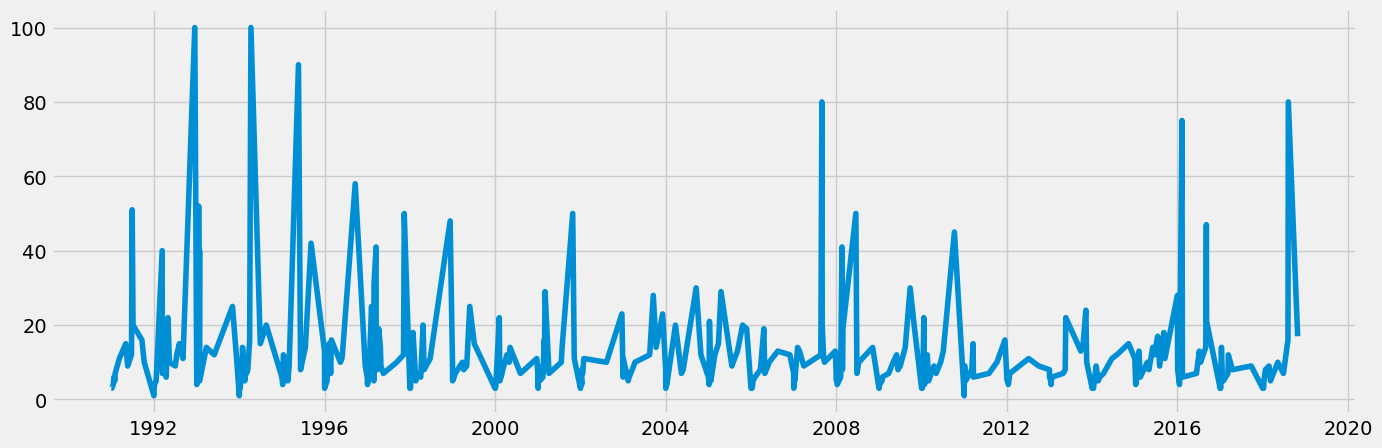

In [53]:
#Plot total_crime over time
plt.figure(figsize=(15,5), dpi=100)
plt.plot(hate_crime_victims_clean)

In [54]:
hate_crime_victims_clean.columns

Index(['total_victims'], dtype='object')

In [55]:
hate_crime_victims_clean.reset_index(inplace=True)

In [56]:
hate_crime_victims_clean.columns

Index(['datetime', 'total_victims'], dtype='object')

In [57]:
hate_crime_victims_clean.set_index('datetime',inplace=True)

In [58]:
hate_crime_victims_clean.index=pd.to_datetime(hate_crime_victims_clean.index)

<Axes: xlabel='datetime'>

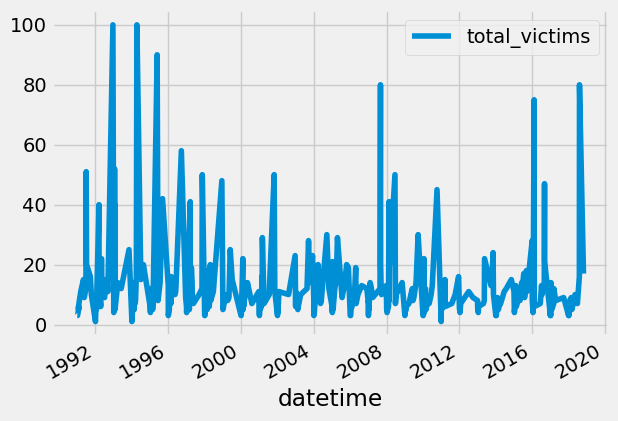

In [59]:
hate_crime_victims_clean.dropna(inplace=True)
hate_crime_victims_clean.plot()

# 3. Time Series Analysis

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [61]:
result=seasonal_decompose(hate_crime_victims_clean['total_victims'], model='additive', period=28)

<Axes: xlabel='datetime'>

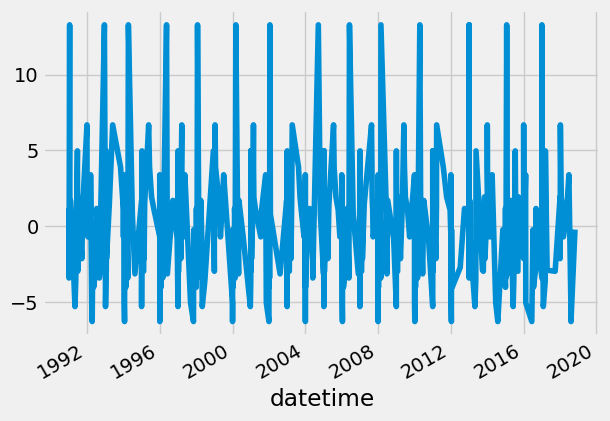

In [62]:
result.seasonal.plot()

<Axes: xlabel='datetime'>

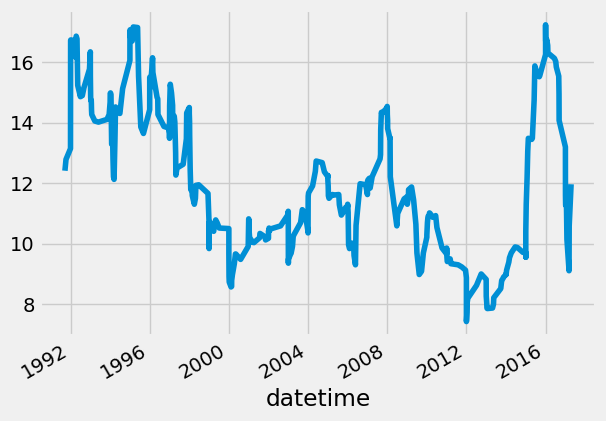

In [63]:
result.trend.plot()

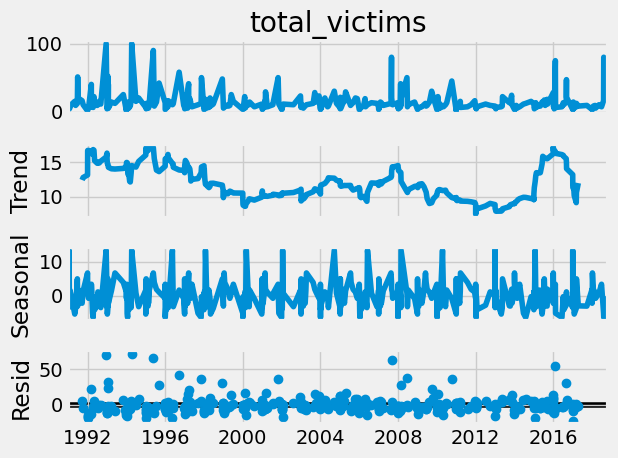

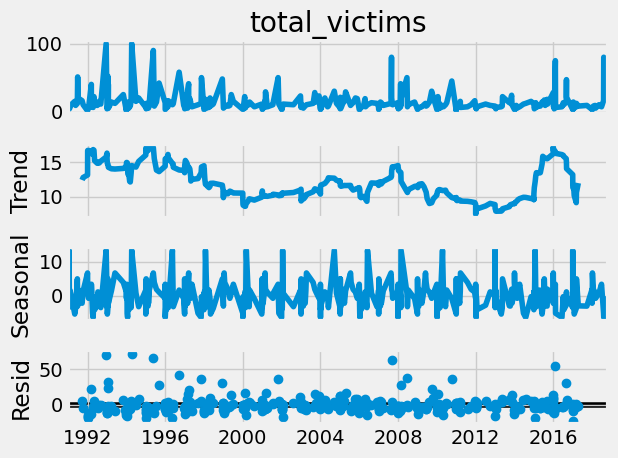

In [64]:
result.plot()

The first chart in the figure above represents the raw data, referred to as the level. This data exhibits fluctuations with both decreases and increases in the count of total hate crime victims. The third component is seasonality, which shows a pattern similar to the level plot. It is also observed that around the end or beginning of a presidential term, there tends to be an increase in the number of hate crime victims. There is minimal unexplained noise in the data. While a few outliers exist, overall, the data is quite smooth and clusters closely around the trend line.

# Testing for Stationarity

In [65]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(hate_crime_victims_clean['total_victims'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.777069e+01
p-value                        3.308484e-30
Number of Lags Used            0.000000e+00
Number of Observations Used    3.890000e+02
Critical Value (1%)           -3.447273e+00
Critical Value (5%)           -2.868999e+00
Critical Value (10%)          -2.570743e+00
dtype: float64


The test statistic is significantly smaller than the critical value at a 90% confidence interval, leading us to reject the null hypothesis. Therefore, there is evidence of a unit root, indicating that the data is stationary. 

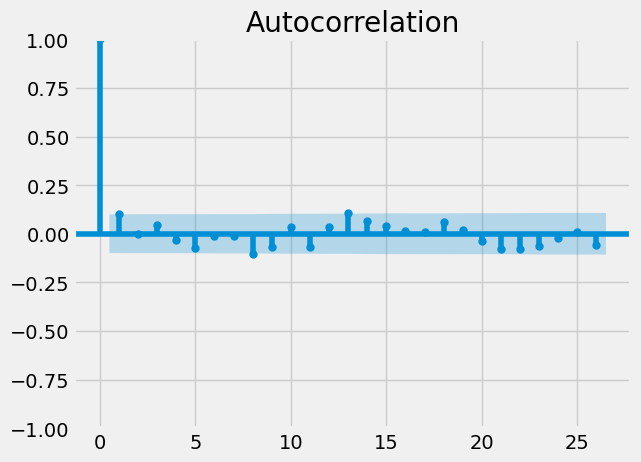

In [66]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(hate_crime_victims_clean)
plt.show()